In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ML.tree import DecisionTreeClassifier

In [2]:
X = np.loadtxt('data/moons/x.txt')
y = np.loadtxt('data/moons/y.txt')

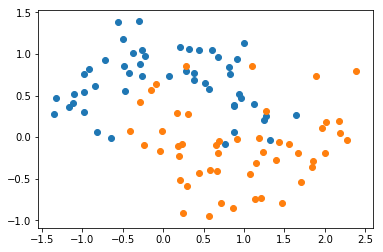

In [3]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [4]:
from ML.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, seed=100)

In [5]:
dt_clf = DecisionTreeClassifier(max_depth=9999999)
dt_clf.fit(X_train, y_train)

In [6]:
dt_clf.score(X_train, y_train)

0.9866666666666667

In [7]:
dt_clf.score(X_test, y_test)

0.76

In [8]:
def plot_decision_boundary(X, y, predict_func, step=0.1):
    x_min = X[:, 0].min() - 0.5
    x_max = X[:, 0].max() + 0.5
    y_min = X[:, 1].min() - 0.5
    y_max = X[:, 1].max() + 0.5
    
    x_mesh, y_mesh = np.meshgrid(np.arange(x_min,x_max,step), np.arange(y_min,y_max,step))
    labels = predict_func(np.concatenate([x_mesh.reshape(-1,1), y_mesh.reshape(-1,1)], axis=1))
    z = labels.reshape(x_mesh.shape)
    
    plt.contourf(x_mesh, y_mesh, z, cmap=plt.cm.Spectral)
    
    plt.scatter(X[:,0],X[:,1],c=y)
    plt.show()

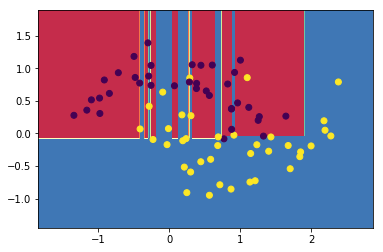

In [9]:
plot_decision_boundary(X_train, y_train, lambda x: dt_clf.predict(x), step=0.01)

In [10]:
def show_tree(node):
    if node is None:
        return ''
    
    result = '{} [label="{}"]\n'.format(id(node), node)
    
    if node.children_left is not None:
        result += '{} [label="{}"]\n'.format(id(node.children_left), node.children_left)
        result += '"{}" -> "{}"\n'.format(id(node), id(node.children_left))
        result += show_tree(node.children_left)
    if node.children_right is not None:
        result += '{} [label="{}"]\n'.format(id(node.children_right), node.children_right)
        result += '"{}" -> "{}"\n'.format(id(node), id(node.children_right))
        result += show_tree(node.children_right)
        
    return result

In [11]:
with(open('temp2.dot', 'w')) as f:
    f.write('digraph{\n' + show_tree(dt_clf.tree_) + '}\n')

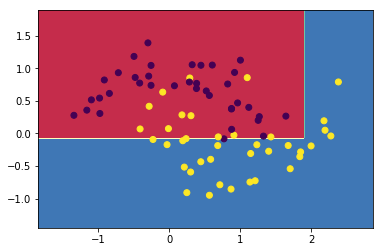

In [12]:
dt_clf = DecisionTreeClassifier(max_depth=3)
dt_clf.fit(X_train, y_train)
plot_decision_boundary(X_train, y_train, lambda x: dt_clf.predict(x), step=0.01)

In [13]:
dt_clf.score(X_test, y_test)

0.8

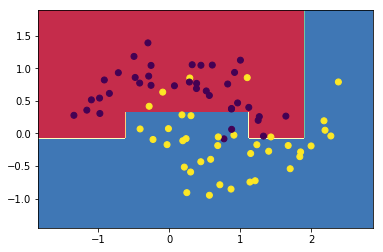

In [14]:
dt_clf = DecisionTreeClassifier(max_depth=9999999, min_samples_leaf=4)
dt_clf.fit(X_train, y_train)
plot_decision_boundary(X_train, y_train, lambda x: dt_clf.predict(x), step=0.01)

In [15]:
dt_clf.score(X_test, y_test)

0.8

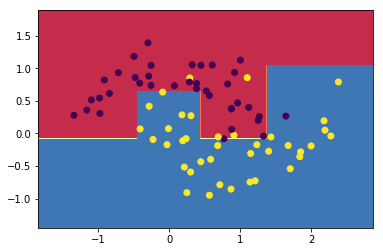

In [16]:
dt_clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)
dt_clf.fit(X_train, y_train)
plot_decision_boundary(X_train, y_train, lambda x: dt_clf.predict(x), step=0.01)

In [17]:
dt_clf.score(X_test, y_test)

0.92

In [18]:
dt_clf.score(X_train, y_train)

0.9333333333333333

In [20]:
with(open('temp2.dot', 'w')) as f:
    f.write('digraph{\n' + show_tree(dt_clf.tree_) + '}\n')

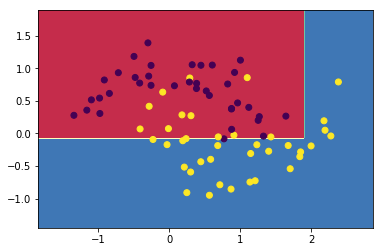

In [21]:
dt_clf = DecisionTreeClassifier(max_depth=2)
dt_clf.fit(X_train, y_train)
plot_decision_boundary(X_train, y_train, lambda x: dt_clf.predict(x), step=0.01)

In [22]:
dt_clf.score(X_test, y_test)

0.8